# About this Project


Dengue fever is bad. It's real bad. Dengue is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash and muscle and joint pain. But severe cases are dangerous, and dengue fever can cause severe bleeding, low blood pressure and even death.

Because it is carried by mosquitoes, the transmission dynamics of dengue are related to climate variables such as temperature and precipitation. Although the relationship to climate is complex, a growing number of scientists argue that climate change is likely to produce distributional shifts that will have significant public health implications worldwide.

**I got into a competition to use open data to predict the occurrence of Dengue in two cities San Juan and Iquito based on climatological data.
This project was a very good opportunity to apply my knowledge regarding data science including data visualisation,feature engineering,data cleaning and Machine Learning.** 



In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

from warnings import filterwarnings
filterwarnings('ignore')

One can see that  above I imported  a different  library called  fastai.This library is a machine learning  and first deep learning library to provide a single consistent interface to all the most commonly used  machine learning and deep learning applications for vision, text, tabular data, time series, and collaborative filtering. Therefore, Ones will see in this projects some unusual and unique functions  and methods be called.

In [3]:
PATH = "C:\\Users\\Marcel\\Desktop\\AI\\M.L competition\\"

# A Tale of Two Cities

This dataset has two cities in it: San Juan, Puerto Rico  and Iquitos, Peru. Since I hypothesize that the spread of dengue may follow different patterns between the two, I will divide the dataset, train seperate models for each city, and then join our predictions before making our final submission.

In [4]:
# load the provided train data

df_raw = pd.read_csv(f'{PATH}dengue_train.csv', low_memory=False, 
                     parse_dates=["week_start_date"],index_col=[0,1,2])

In [5]:
# checking the dataset and its features
df_raw.head()

total_cases week_start_date   ndvi_ne   ndvi_nw  \
city year weekofyear                                                    
sj   1990 18                    4      1990-04-30  0.122600  0.103725   
          19                    5      1990-05-07  0.169900  0.142175   
          20                    4      1990-05-14  0.032250  0.172967   
          21                    3      1990-05-21  0.128633  0.245067   
          22                    6      1990-05-28  0.196200  0.262200   

                       ndvi_se   ndvi_sw  precipitation_amt_mm  \
city year weekofyear                                             
sj   1990 18          0.198483  0.177617                 12.42   
          19          0.162357  0.155486                 22.82   
          20          0.157200  0.170843                 34.54   
          21          0.227557  0.235886                 15.36   
          22          0.251200  0.247340                  7.52   

                      reanalysis_air_temp_k  reanalysis_avg_temp_k  \
city year weekofyear                                                 
sj   1990 18                     297.572857             297.742857   
          19                     298.211429             298.442857   
          20                     298.781429             298.878571   
          21                     298.987143             299.228571   
          22                     299.518571             299.664286   

                      reanalysis_dew_point_temp_k  ...  \
city year weekofyear                               ...   
sj   1990 18                           292.414286  ...   
          19                           293.951429  ...   
          20                           295.434286  ...   
          21                           295.310000  ...   
          22                           295.821429  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22                   3.014286           28.942857   

                      station_diur_temp_rng_c  stat

In [6]:
# Seperate data for San Juan and Iquito
sj = df_raw.loc['sj']
iq = df_raw.loc['iq']
    

In [7]:
f"San Juan = {sj.shape} Iquito = {iq.shape}"

'San Juan = (936, 22) Iquito = (520, 22)'

In [8]:
#Function to display the dataset in a better way
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [9]:
#San juan 
display_all(sj.tail().T)

year                                                  2008  \
weekofyear                                              13   
total_cases                                              4   
week_start_date                        2008-03-25 00:00:00   
ndvi_ne                                            0.07785   
ndvi_nw                                            -0.0399   
ndvi_se                                           0.310471   
ndvi_sw                                           0.296243   
precipitation_amt_mm                                 27.19   
reanalysis_air_temp_k                              296.959   
reanalysis_avg_temp_k                              296.957   
reanalysis_dew_point_temp_k                        292.096   
reanalysis_max_air_temp_k                            299.7   
reanalysis_min_air_temp_k                            294.4   
reanalysis_precip_amt_kg_per_m2                       7.55   
reanalysis_relative_humidity_percent               74.2471   
reanalysis_sat_precip_amt_mm                         27.19   
reanalysis_specific_humidity_g_per_kg              13.6443   
reanalysis_tdtr_k                                  2.88571   
station_avg_temp_c                                 25.0429   
station_diur_temp_rng_c                            5.78571   
station_max_temp_c                                      30   
station_min_temp_c                                    21.1   
station_precip_mm                                      1.8   

year                                                        \
weekofyear                                              14   
total_cases                                              3   
week_start_date                        2008-04-01 00:00:00   
ndvi_ne                                             -0.038   
ndvi_nw                                         -0.0168333   
ndvi_se                                           0.119371   
ndvi_sw                                          0.0663857   
precipitation_amt_mm                                  3.82   
reanalysis_air_temp_k                              298.081   
reanalysis_avg_temp_k                              298.229   
reanalysis_dew_point_temp_k                        293.236   
reanalysis_max_air_temp_k                            299.8   
reanalysis_min_air_temp_k                            296.5   
reanalysis_precip_amt_kg_per_m2                       3.67   
reanalysis_relative_humidity_percent                  74.6   
reanalysis_sat_precip_amt_mm                          3.82   
reanalysis_specific_humidity_g_per_kg              14.6629   
reanalysis_tdtr_k                                  2.71429   
station_avg_temp_c                                 26.2429   
station_diur_temp_rng_c                            6.81429   
station_max_temp_c                                    30.6   
station_min_temp_c                                    22.2   
station_precip_mm                                      0.5   

year                                                        \
weekofyear                                              15   
total_cases                                              1   
week_start_date                        2008-04-08 00:00:00   
ndvi_ne                                            -0.1552   
ndvi_nw                                           -0.05275   
ndvi_se                                           0.137757   
ndvi_sw                                           0.141214   
precipitation_amt_mm                                 16.96   
reanalysis_air_temp_k                               297.46   
reanalysis_avg_temp_k                              297.564   
reanalysis_dew_point_temp_k                        292.733   
reanalysis_max_air_temp_k                            299.4   
reanalysis_min_air_temp_k                            295.8   
reanalysis_precip_amt_kg_per_m2                         35   
reanalysis_relative_humidity_percent               75.0271   
reanalysis_sat_precip_amt_mm  

In any sort of data science work, it's important to look at your data, to make sure you understand the format, how it's stored, what type of values it holds, etc. Even if you've read descriptions about your data, the actual data may not be what you expect.

In [10]:
display_all(sj.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
total_cases,936,NaN,NaT,NaN,NaT,NaT,34.1806,51.3814,0,9,19,37,461
week_start_date,936,936,2000-05-13,1,1990-04-30,2008-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ndvi_ne,745,NaN,NaT,NaN,NaT,NaT,0.0579247,0.107153,-0.40625,0.0045,0.0577,0.1111,0.4934
ndvi_nw,887,NaN,NaT,NaN,NaT,NaT,0.0674691,0.0924788,-0.4561,0.016425,0.068075,0.1152,0.4371
ndvi_se,917,NaN,NaT,NaN,NaT,NaT,0.177655,0.0571663,-0.0155333,0.139283,0.177186,0.212557,0.393129
ndvi_sw,917,NaN,NaT,NaN,NaT,NaT,0.165956,0.0560733,-0.0634571,0.129157,0.165971,0.202771,0.38142
precipitation_amt_mm,927,NaN,NaT,NaN,NaT,NaT,35.4708,44.6061,0,0,20.8,52.18,390.6
reanalysis_air_temp_k,930,NaN,NaT,NaN,NaT,NaT,299.164,1.23643,295.939,298.195,299.254,300.133,302.2
reanalysis_avg_temp_k,930,NaN,NaT,NaN,NaT,NaT,299.277,1.21864,296.114,298.3,299.379,300.229,302.164
reanalysis_dew_point_temp_k,930,NaN,NaT,NaN,NaT,NaT,295.11,1.56994,289.643,293.848,295.464,296.419,297.796


In [11]:
#Iquito
display_all(iq.describe(include='all').T)


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
total_cases,520,NaN,NaT,NaN,NaT,NaT,7.56538,10.7655,0,1,5,9,116
week_start_date,520,520,2007-05-21,1,2000-07-01,2010-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ndvi_ne,517,NaN,NaT,NaN,NaT,NaT,0.263869,0.0813702,0.0617286,0.2,0.263643,0.319971,0.508357
ndvi_nw,517,NaN,NaT,NaN,NaT,NaT,0.238783,0.0767515,0.03586,0.17954,0.232971,0.293929,0.454429
ndvi_se,517,NaN,NaT,NaN,NaT,NaT,0.250126,0.0773539,0.02988,0.194743,0.2498,0.3023,0.538314
ndvi_sw,517,NaN,NaT,NaN,NaT,NaT,0.266779,0.086345,0.0641833,0.204129,0.262143,0.32515,0.546017
precipitation_amt_mm,516,NaN,NaT,NaN,NaT,NaT,64.2457,35.219,0,39.105,60.47,85.7575,210.83
reanalysis_air_temp_k,516,NaN,NaT,NaN,NaT,NaT,297.87,1.171,294.636,297.092,297.823,298.649,301.637
reanalysis_avg_temp_k,516,NaN,NaT,NaN,NaT,NaT,299.133,1.33207,294.893,298.221,299.121,300.123,302.929
reanalysis_dew_point_temp_k,516,NaN,NaT,NaN,NaT,NaT,295.493,1.41723,290.089,294.594,295.852,296.549,298.45


There are a lot of climate variables here, but the first thing that I noted is that the week_start_date is included in the feature set. This makes it easier for data scientist to create time based features.

**I will use  add_datepart (fastai method) to extract particular date fields from a complete datetime for the purpose of constructing categoricals. I always consider this feature extraction step when working with date-time. Without expanding date-time into these additional fields, I could not capture any trend/cyclical behavior as a function of time at any of these granularities.After running add_datepart, it will add many numerical columns and remove week_start_date column.**

Next, let's check to see if there are missing values in this dataset:

In [12]:
#MIssing values in SJ 
display_all(sj.isnull().sum().sort_index()/len(sj))

ndvi_ne                                  0.204060
ndvi_nw                                  0.052350
ndvi_se                                  0.020299
ndvi_sw                                  0.020299
precipitation_amt_mm                     0.009615
reanalysis_air_temp_k                    0.006410
reanalysis_avg_temp_k                    0.006410
reanalysis_dew_point_temp_k              0.006410
reanalysis_max_air_temp_k                0.006410
reanalysis_min_air_temp_k                0.006410
reanalysis_precip_amt_kg_per_m2          0.006410
reanalysis_relative_humidity_percent     0.006410
reanalysis_sat_precip_amt_mm             0.009615
reanalysis_specific_humidity_g_per_kg    0.006410
reanalysis_tdtr_k                        0.006410
station_avg_temp_c                       0.006410
station_diur_temp_rng_c                  0.006410
station_max_temp_c                       0.006410
station_min_temp_c                       0.006410
station_precip_mm                        0.006410


In [13]:
#MIssing values in Iq
display_all(iq.isnull().sum().sort_index()/len(iq))

ndvi_ne                                  0.005769
ndvi_nw                                  0.005769
ndvi_se                                  0.005769
ndvi_sw                                  0.005769
precipitation_amt_mm                     0.007692
reanalysis_air_temp_k                    0.007692
reanalysis_avg_temp_k                    0.007692
reanalysis_dew_point_temp_k              0.007692
reanalysis_max_air_temp_k                0.007692
reanalysis_min_air_temp_k                0.007692
reanalysis_precip_amt_kg_per_m2          0.007692
reanalysis_relative_humidity_percent     0.007692
reanalysis_sat_precip_amt_mm             0.007692
reanalysis_specific_humidity_g_per_kg    0.007692
reanalysis_tdtr_k                        0.007692
station_avg_temp_c                       0.071154
station_diur_temp_rng_c                  0.071154
station_max_temp_c                       0.026923
station_min_temp_c                       0.015385
station_precip_mm                        0.030769


Since we can't build a model without those values, I'll use proc_df **(fastai function)**  to replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.This is probably a good part of the problem to improve the score by getting smarter.

# Distribution of labels
The target variable, total_cases is a non-negative integer, which means we're looking to make some count predictions. Standard regression techniques for this type of prediction work well, so I will apply Random Forest Regression beacause It can handle binary features, categorical features, and numerical features. There is very little pre-processing that needs to be done. The data does not need to be rescaled or transformed.

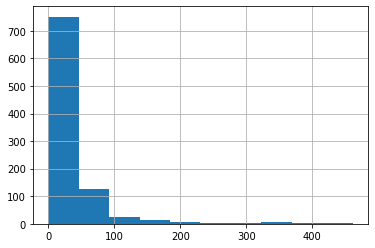

In [14]:
#Sj label histograma

sj['total_cases'].hist()

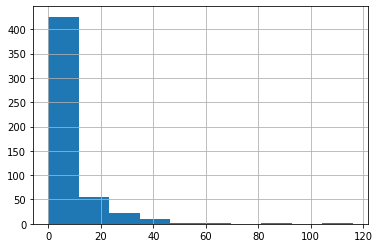

In [15]:
#Iq label histograma

iq['total_cases'].hist()

As we can see, both SJ and Iq total_cases have a negative binomial distribuition

# Which inputs strongly correlate with total_cases?
My next step in this process will be to check the correlation between the dependent variable and the features .My primary purpose here is to get a better understanding of the problem domain rather than take out the last possible bit of predictive accuracy. 

In [16]:
#compute the correlations
sj_correlation = sj.corr()
iq_correlation = iq.corr()

Text(0.5, 1, 'San Juan Variable COrrelations')

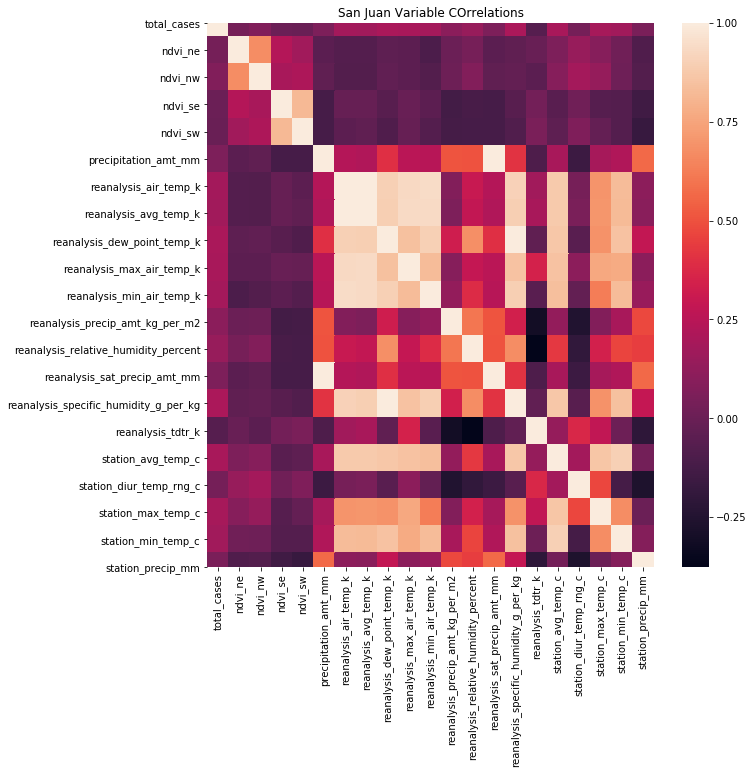

In [17]:
#plot san juan
plt.figure(figsize = (10,10))
sj_heat = sns.heatmap(sj_correlation)
plt.title('San Juan Variable COrrelations')

Text(0.5, 1, 'Iquito Variable COrrelations')

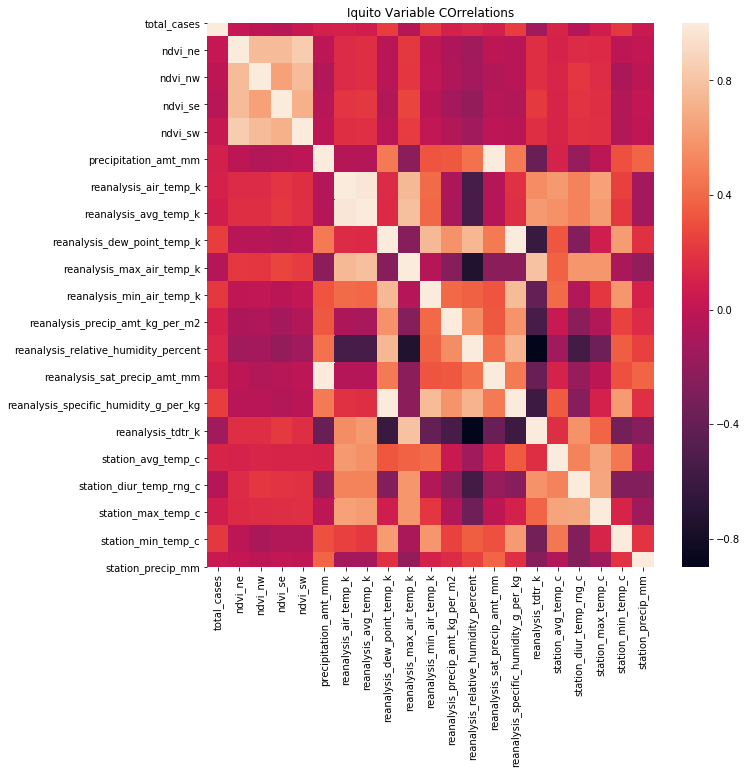

In [18]:
#plot Iquito
plt.figure(figsize = (10,10))
sj_heat = sns.heatmap(iq_correlation)
plt.title('Iquito Variable COrrelations')

# A mosquito model
Now that I've explored this data, it's time to start modeling. My first step will be to build a function that does all of the preprocessing using the add_part method and proc_df funcion mentioned before. This will make our lives easier, since it needs to be applied to the test set and the traning set before we make our predictions.

In [19]:
#global variable
nas = {}
#function to preprecess the dataset
def preprocess_data(data_path,n_valid):
    
        global nas 
        add_datepart(data_path,"week_start_date") # method add_datepart 
     
   
        df, y,nas = proc_df(data_path, 'total_cases') #function proc_df
        
        #spliting the dataset in trainning and validation set
        def split_vals(a,n): return a[:n].copy(), a[n:].copy()
        
        n_trn = len(df)-n_valid
        raw_train, raw_valid = split_vals(df_raw, n_trn)
        X_train, X_valid = split_vals(df, n_trn)
        y_train, y_valid = split_vals(y, n_trn)
    
  
  
       
        return X_train,X_valid,y_train,y_valid,df

In [20]:
#Appling the  preprocess function in SJ dataset
X_train_sj,X_valid_sj,y_train_sj,y_valid_sj,sj_df = preprocess_data(sj,260)

#Appling the preprocess function in Iquito dataset
X_train_iq,X_valid_iq,y_train_iq,y_valid_iq,iq_df = preprocess_data(iq,156)

# SAn Juan and Iquito dataset after preprocessing

I displayed SJ dataset in order to show the changings after preprocessing. add_datepart method created new columns  regarding time from week_start_date and dropped it as well as proc_df function deatl with missing values and sppliting the data. 

In [21]:
display_all(sj_df.tail().T)

year                                            2008                          \
weekofyear                                        13          14          15   
ndvi_ne                                      0.07785      -0.038     -0.1552   
ndvi_nw                                      -0.0399  -0.0168333    -0.05275   
ndvi_se                                     0.310471    0.119371    0.137757   
ndvi_sw                                     0.296243   0.0663857    0.141214   
precipitation_amt_mm                           27.19        3.82       16.96   
reanalysis_air_temp_k                        296.959     298.081      297.46   
reanalysis_avg_temp_k                        296.957     298.229     297.564   
reanalysis_dew_point_temp_k                  292.096     293.236     292.733   
reanalysis_max_air_temp_k                      299.7       299.8       299.4   
reanalysis_min_air_temp_k                      294.4       296.5       295.8   
reanalysis_precip_amt_kg_per_m2                 7.55        3.67          35   
reanalysis_relative_humidity_percent         74.2471        74.6     75.0271   
reanalysis_sat_precip_amt_mm                   27.19        3.82       16.96   
reanalysis_specific_humidity_g_per_kg        13.6443     14.6629     14.1843   
reanalysis_tdtr_k                            2.88571     2.71429     2.18571   
station_avg_temp_c                           25.0429     26.2429          25   
station_diur_temp_rng_c                      5.78571     6.81429     5.71429   
station_max_temp_c                                30        30.6        29.4   
station_min_temp_c                              21.1        22.2        21.7   
station_precip_mm                                1.8         0.5        30.7   
week_start_Year                                 2008        2008        2008   
week_start_Month                                   3           4           4   
week_start_Week                                   13          14          15   
week_start_Day                                    25           1           8   
week_start_Dayofweek                               1           1           1   
week_start_Dayofyear                              85          92          99   
week_start_Is_month_end                        False       False       False   
week_start_Is_month_start                      False        True       False   
week_start_Is_quarter_end                      False       False       False   
week_start_Is_quarter_start                    False        True       False   
week_start_Is_year_end                         False       False       False   
week_start_Is_year_start                       False       False       False   
week_start_Elapsed                        1206403200  1207008000  1207612800   
ndvi_ne_na                                     False       False       False   
ndvi_nw_na                                     False       False       False   
ndvi_se_na                                     False       False       False   
ndvi_sw_na                                     False       False       False   
precipitation_amt_mm_na                        False       False       False   
reanalysis_air_temp_k_na                       False       False       False   
reanalysis_avg_temp_k_na                       False       False       False   
reanalysis_dew_point_temp_k_na                 False       False       False   
reanalysis_max_air_temp_k_na                   False       False       False   
reanalysis_min_air_temp_k_na                   False       False       False   
reanalysis_precip_amt_kg_per_m2_na             False       False       False   
reanalysis_relative_humidity_percent_na        False       False       False   
reanalysis_sat_precip_amt_mm_na                False       False       False   
reanalysis_specific_humidity_g_per_kg_na       False       False       False   
reanalysis_tdtr_k_na                           False       False       False   


In [22]:
display_all(sj_df.isnull().sum().sort_index()/len(sj_df))

ndvi_ne                                     0.0
ndvi_ne_na                                  0.0
ndvi_nw                                     0.0
ndvi_nw_na                                  0.0
ndvi_se                                     0.0
ndvi_se_na                                  0.0
ndvi_sw                                     0.0
ndvi_sw_na                                  0.0
precipitation_amt_mm                        0.0
precipitation_amt_mm_na                     0.0
reanalysis_air_temp_k                       0.0
reanalysis_air_temp_k_na                    0.0
reanalysis_avg_temp_k                       0.0
reanalysis_avg_temp_k_na                    0.0
reanalysis_dew_point_temp_k                 0.0
reanalysis_dew_point_temp_k_na              0.0
reanalysis_max_air_temp_k                   0.0
reanalysis_max_air_temp_k_na                0.0
reanalysis_min_air_temp_k                   0.0
reanalysis_min_air_temp_k_na                0.0
reanalysis_precip_amt_kg_per_m2         

# Training and Validation time
This is where I start getting down to business. As I said above, I will train a Random FOrest model, In this function the model will be trained and the Mean Absolute Error **(metric used by the competition to check the best models)**


In [23]:
 # function of the model 
def model(X_train,X_valid,y_train,y_valid): 
    m = RandomForestRegressor(n_estimators = 100, n_jobs=-1,oob_score = True)
    m_fitted =  m.fit(X_train, y_train)
   
    from sklearn.metrics import mean_absolute_error
    res = [f' MAE Train: {mean_absolute_error(m.predict(X_train), y_train)},  MAE Validation: {mean_absolute_error(m.predict(X_valid), y_valid)}'
                ]
   
    print(res)
    return m_fitted 

In [24]:
# trainning and validating Sj dataset
sj_fitted = model(X_train_sj,X_valid_sj,y_train_sj,y_valid_sj)

[' MAE Train: 5.103017751479291,  MAE Validation: 15.280192307692309']


In [25]:
# trainning and validating Iquito  dataset
iq_fitted = model(X_train_iq,X_valid_iq,y_train_iq,y_valid_iq)

[' MAE Train: 1.451813186813187,  MAE Validation: 7.5875']


As We can see, **San Juan** and **Iquito** dataset had a good MAE. **In the competition I would be in the top 10.**


# Feature importance
It's not normally enough to just to know that a model can make accurate predictions - I also want to make it  as accurate as possible . The most important way to make  this is with feature importance. 

I will use another function (rf_feat_importance) from fastai library which takes a model m and dataframe df_trn (because we need to know names of columns) and it will give you back a Pandas dataframe showing you in order of importance how important each column was.

The feature importance tells us in this random forest, which columns mattered. We have dozens of columns in this dataset, and here, we are picking out the top 10. rf_feat_importance is part of Fast.ai library 

In [26]:
# allocate the top 10 features of SJ in fi variable
fi = rf_feat_importance(sj_fitted,sj_df ); fi[:10]

,cols,imp
36,ndvi_sw_na,0.217507
35,ndvi_se_na,0.198333
32,week_start_Elapsed,0.099994
22,week_start_Week,0.089226
15,station_avg_temp_c,0.057898
7,reanalysis_dew_point_temp_k,0.052690
13,reanalysis_specific_humidity_g_per_kg,0.044892
25,week_start_Dayofyear,0.040078
24,week_start_Dayofweek,0.025260
20,week_start_Year,0.016266


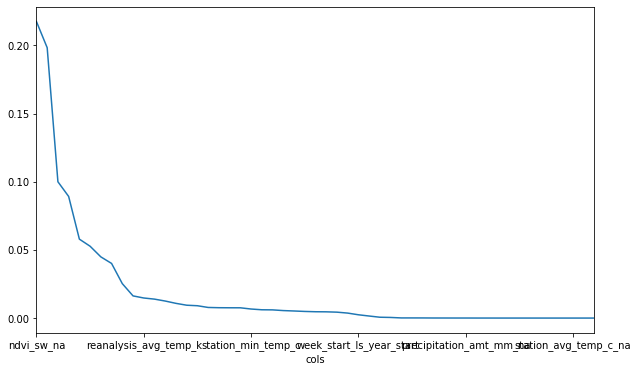

In [27]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

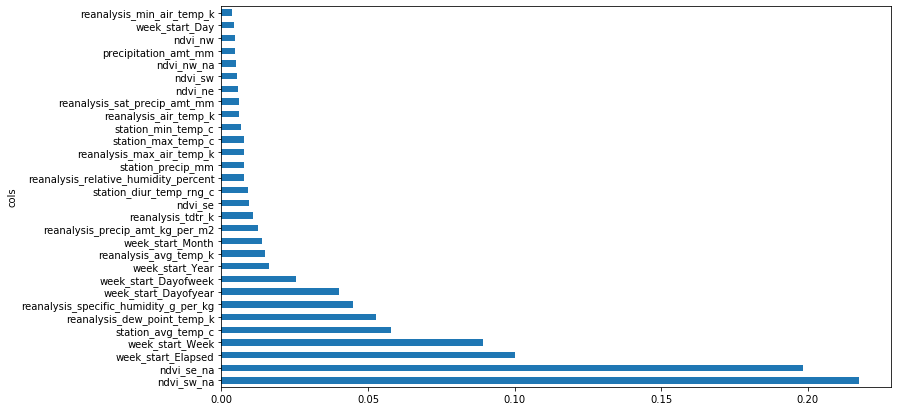

In [28]:
#function to plot fi variable
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

# Collinearity and Redudant Features

Now I will throw away some redudants features  because when you remove redundant columns, you are also removing sources of collinearity. In other words, two columns that might be related to each other.I will  filter out those where the importance is equal to or less than 0.005 

In [29]:
#filtering
to_keep = fi[fi.imp>0.005].cols; len(to_keep)


25

In [30]:
#splitting data 
def split_vals(a,n): return a[:n].copy(), a[n:].copy()
n_trn = len(sj_df)-260

df_keep = sj_df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [31]:
#training new model
m = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=False)
m.fit(X_train, y_train_sj)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [32]:
from sklearn.metrics import mean_absolute_error
res = [f' MAE Train: {mean_absolute_error(m.predict(X_train), y_train_sj)},  MAE Validation: {mean_absolute_error(m.predict(X_valid), y_valid_sj)}'
           ]
   
print(res)

[' MAE Train: 5.021819526627219,  MAE Validation: 14.580615384615385']


AS we can see, the model got a bit better from 15.2 to 15.0 in MAE Valiadtion.I will keep the previoues model,though.

# load the provided test data
This Unseen dataset will be the predictions that the model will make of a future time.

In [33]:
df_test = pd.read_csv("C:\\Users\\Marcel\\Desktop\\AI\\M.L competition\\dengue_features_test.csv", low_memory=False, 
                     parse_dates=["week_start_date"],index_col=[0,1,2])

In [34]:
df_test.head()

week_start_date  ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                          
sj   2008 18              2008-04-29  -0.0189 -0.018900  0.102729  0.091200   
          19              2008-05-06  -0.0180 -0.012400  0.082043  0.072314   
          20              2008-05-13  -0.0015       NaN  0.151083  0.091529   
          21              2008-05-20      NaN -0.019867  0.124329  0.125686   
          22              2008-05-27   0.0568  0.039833  0.062267  0.075914   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   2008 18                         78.60             298.492857   
          19                         12.56             298.475714   
          20                          3.66             299.455714   
          21                          0.00             299.690000   
          22                          0.76             299.780000   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   2008 18                     298.550000                   294.527143   
          19                     298.557143                   294.395714   
          20                     299.357143                   295.308571   
          21                     299.728571                   294.402857   
          22                     299.671429                   294.760000   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   2008 18                              301.1  ...   
          19                              300.8  ...   
          20                              302.2  ...   
          21                              303.0  ...   
          22                              302.3  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   2008 18                                    25.37   
          19                                    21.83   
          20                                     4.12   
          21                                     2.20   
          22                                     4.36   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   2008 18                                     78.781429   
          19                                     78.230000   
          20                                     78.270000   
          21                                     73.015714   
          22                                     74.084286   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   2008 18                                 78.60   
          19                                 12.56   
          20                                  3.66   
          21                                  0.00   
          22                                  0.76   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   2008 18                                      15.918571   
          19                                      15.791429   
          20                                      16.674286   
          21                                      15.775714   
          22                                      16.137143   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   2008 18                   3.128571           26.528571   
          19                   2.571429           26.071429   
          20                   4.428571           27.928571   
          21                   4.342857           28.057143   
          22           

In [35]:
#separating the raw data test
sj_test = df_test.loc['sj']
iq_test = df_test.loc['iq']
    

In [36]:
#function to preprocess the data test
def preprocess_test(data_path):
    global nas
    add_datepart(data_path,"week_start_date")
    df,_,nas = proc_df(data_path,na_dict=nas)
    
    
    return df   
   

In [37]:
#preprocessing the data test
sj_test_result = preprocess_test(sj_test)
iq_test_result = preprocess_test(iq_test)

In [38]:
#predicting SJ and Iq test and transforming in integer
sj_predictions = sj_fitted.predict(sj_test_result).astype(int)   
iq_predictions = iq_fitted.predict(iq_test_result).astype(int)

In [39]:
#Submission form
submission = pd.read_csv("C:\\Users\\Marcel\\Desktop\\AI\\M.L competition\\submission_format.csv",index_col=[0,1,2])

In [40]:
#COncatenating sj and iq predictions
submission.total_cases = np.concatenate([sj_predictions, iq_predictions])

In [41]:
submission

total_cases
city year weekofyear             
sj   2008 18                    5
          19                    6
          20                    5
          21                   10
          22                    5
...                           ...
iq   2013 22                    5
          23                    4
          24                    4
          25                    3
          26                    3

[416 rows x 1 columns]

In [42]:
submission.to_csv("C:\\Users\\Marcel\\Desktop\\AI\\M.L competition\\submission_final3.csv")